<a href="https://colab.research.google.com/github/IvanDaniarAP/MLTask/blob/main/uts/UTS_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**UTS Machine Learning**


---


*  Nama :Ivan Daniar Aryaputra Purimahua
*  NIM :1103204146


---


*   Dataset: Marketing Campaign
*   Model: K-Means






# **Loading Marketing Campaign**
---

Prompt: berikan saya kode dengan membaca dataset yang sudah saya upload kedalam collab runtime yang jalurnya sudah saya salin untuk dibaca lalu buatkan kode mengimpor modul numpy, pandas, seaborn, plotly express, plotly graph_objects, matplotlib.pyplot, dan mengatur agar plotly express dapat bekerja di dalam notebook. Pastikan juga untuk mengabaikan pesan peringatan menggunakan `warnings.filterwarnings('ignore')`. .

---
Dengan Prompt yang saya panggil merupakan bagian awal dari pengembangan analisis data menggunakan Python. Pertama, pustaka-pustaka yang diperlukan, seperti NumPy, Pandas, Seaborn, Plotly Express, Plotly Graph Objects, dan Matplotlib, diimpor untuk mendukung fungsi visualisasi dan manipulasi data. Selanjutnya, `%matplotlib inline` digunakan untuk menampilkan plot Matplotlib secara langsung di dalam notebook. Selain itu, peringatan (warnings) diabaikan dengan mengaktifkan filter peringatan yang mengabaikan pesan peringatan selama eksekusi. Terakhir, dataset dari file CSV ('marketing_campaign.csv') dibaca menggunakan Pandas, dan salinannya dibuat dalam variabel `df` untuk kemudahan manipulasi dan analisis data lebih lanjut. Output dari lima baris pertama dari dataframe juga ditampilkan menggunakan metode `head()`.


In [ ]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading and making a copy of the dataset

main_df = pd.read_csv("/content/marketing_campaign.csv", sep="\t")
df = main_df.copy()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# **EDA**

Prompt : Berikan saya kode untuk menampilkan dimensi (jumlah baris dan kolom) dari DataFrame tersebut

In [ ]:
# Checking the shape of the dataset

df.shape

(2240, 29)

Kode di atas digunakan untuk mengecek dimensi atau bentuk dataset dengan menggunakan properti `shape`. Hasilnya, output `(2240, 29)` menunjukkan bahwa dataset ini terdiri dari 2240 baris dan 29 kolom. Jumlah baris mencerminkan jumlah entri atau observasi dalam dataset, sementara jumlah kolom menunjukkan berbagai fitur atau variabel yang terdapat dalam setiap entri. Dengan mengetahui dimensi dataset, kita mendapatkan informasi dasar tentang seberapa besar dataset yang sedang diolah, yang berguna untuk langkah-langkah analisis data selanjutnya.

Prompt : Berikan saya kode untuk menampilkan informasi rinci tentang DataFrame tersebut.


In [ ]:
# Finding the basic information regarding dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Output tersebut merupakan hasil dari metode `info()` pada DataFrame, yang memberikan informasi rinci mengenai dataset, termasuk jumlah total baris, kolom, dan tipe data dari setiap kolom.

- Jumlah baris (entries): Dataset ini terdiri dari 2240 entri (baris).
- Jumlah kolom (columns): Terdapat 29 kolom dalam dataset.
- Informasi kolom: Masing-masing kolom memiliki label (misalnya, "ID", "Year_Birth", "Education", dll.), jumlah non-null entries (non-Null Count), dan tipe data (Dtype) dari setiap kolom.
- Tipe data: Tipe data melibatkan integer (`int64`), float (`float64`), dan object (teks atau campuran tipe data).

Selain itu, informasi yang disajikan juga mencakup besarnya penggunaan memori oleh dataset. Pada kasus ini, dataset menggunakan sekitar 507.6 KB.

Penting untuk memperhatikan bahwa kolom "Income" memiliki beberapa nilai yang hilang (`null`), yang perlu diperhatikan saat melakukan analisis.

Prompt : Berikan saya kode untuk menampilkan jumlah nilai unik (unique values) untuk setiap kolom dalam DataFrame tersebut

In [ ]:
# Finding the number of unique values present in each column

df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

Perintah `df.nunique()` digunakan untuk menemukan jumlah nilai unik yang ada dalam setiap kolom DataFrame. Outputnya akan memberikan informasi berapa banyak nilai unik yang ada dalam setiap kolom. Setiap baris dalam output mewakili satu kolom dari DataFrame dan nilai di bawahnya menunjukkan jumlah nilai unik dalam kolom tersebut. Jumlah nilai unik adalah metrik penting yang membantu dalam memahami variasi dan distribusi data di dalam setiap fitur.

Prompt : Berikan saya kode untuk menampilkan informasi tentang keberadaan nilai-nilai NaN (Not a Number) dalam setiap kolom.


In [ ]:
# Checking if any NaN is present in column or not

df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

Perintah `df.isna().any()` digunakan untuk membaca

*   List item

memeriksa apakah ada nilai NaN (Not a Number) dalam setiap kolom DataFrame. Outputnya memberikan informasi boolean, di mana nilai `True` menunjukkan adanya setidaknya satu nilai NaN dalam kolom tersebut, sementara nilai `False` menunjukkan bahwa kolom tersebut tidak mengandung nilai NaN. Hal ini membantu dalam mengidentifikasi kolom-kolom yang mungkin memerlukan pengelolaan nilai yang hilang atau pembersihan data.

Prompt : Berikan saya kode untuk menampilkan heatmap menggunakan fungsi `sns.heatmap()` untuk visualisasi keberadaan nilai-nilai yang hilang (missing values) dalam setiap kolom.

<Axes: >

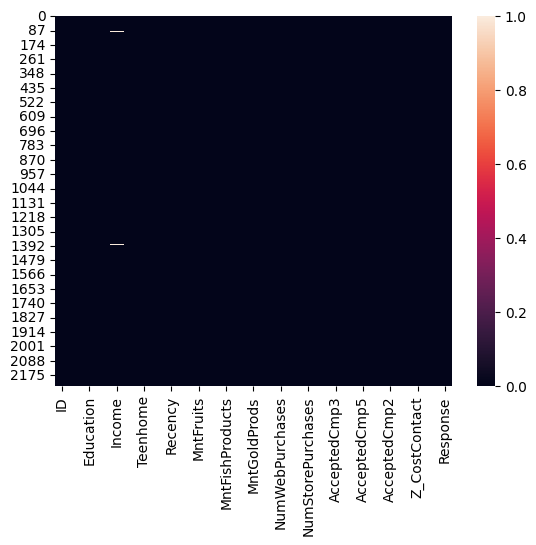

In [ ]:
# Checking for null value using heatmap

sns.heatmap(df.isnull())

# Checking for null value using heatmap



---
Prompt :
Buat sebuah perintah yang menjelaskan bahwa kita akan menghapus kolom "Z_CostContact" dan "Z_Revenue" dari DataFrame dan menampilkan hasilnya menggunakan df.head().

---




In [ ]:
# Dropping columns because they will not contribute anything in model building

df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


Perintah `df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)` digunakan untuk menghapus kolom "Z_CostContact" dan "Z_Revenue" dari DataFrame `df`. Penghapusan ini dilakukan karena kolom-kolom tersebut tidak diharapkan memberikan kontribusi signifikan dalam membangun model. Setelah penghapusan, DataFrame diubah dan lima baris pertama dari DataFrame yang telah dimodifikasi ditampilkan untuk memberikan gambaran struktur data yang baru.

Prompt : Berikan saya kode untuk menampilkan heatmap dari korelasi antar kolom, atur ukuran figure menjadi (20, 20) dan tambahkan nilai korelasi sebagai anotasi pada heatmap


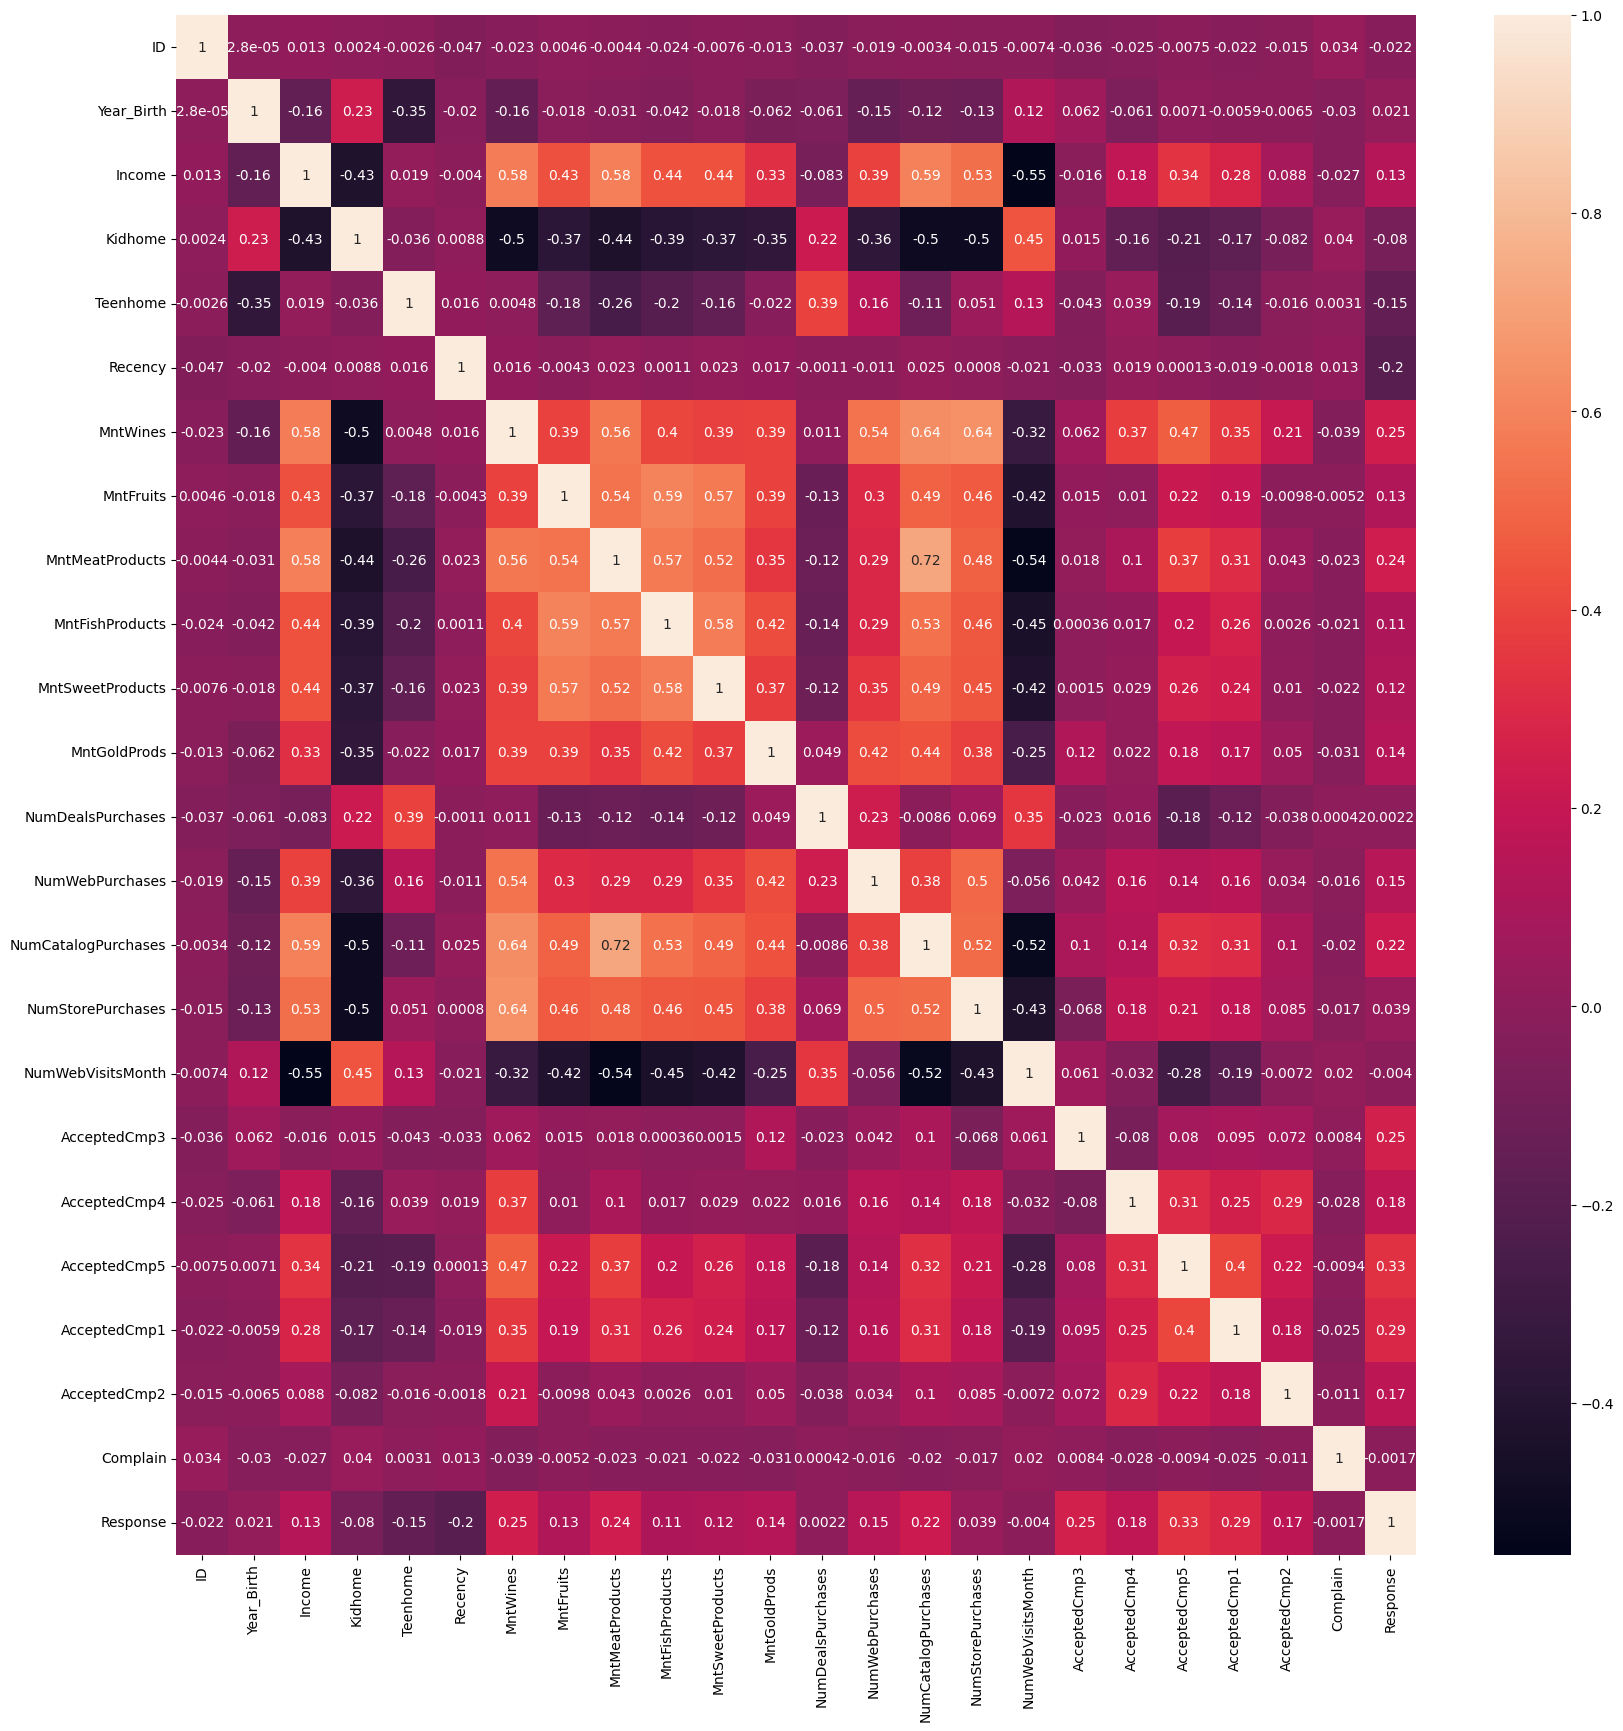

In [ ]:
# Finding the correlation between the feature column

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

Perintah `plt.figure(figsize=(20,20))` digunakan untuk membuat gambar (figure) dengan ukuran 20x20 inci sebelum membuat heatmap. Kemudian, `sns.heatmap(df.corr(), annot=True)` digunakan untuk membuat heatmap dari korelasi antar fitur dalam DataFrame `df`. Parameter `annot=True` menunjukkan bahwa nilai korelasi akan ditampilkan di dalam sel heatmap. Akhirnya, `plt.show()` digunakan untuk menampilkan gambar heatmap yang telah dibuat. Heatmap ini memberikan visualisasi yang baik tentang sejauh mana variabel-variabel dalam dataset berkorelasi satu sama lain.

Prompt : Berikan saya kode untuk mengurutkan nilai korelasi secara menurun, dan tampilkan nilai korelasi terbesar dari posisi ke-24 hingga ke-50 dengan langkah 2.


In [ ]:
# Checking for correlation by unstacking data

corr = df.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[24:50:2]

MntMeatProducts      NumCatalogPurchases    0.723827
NumStorePurchases    MntWines               0.642100
NumCatalogPurchases  MntWines               0.635226
MntFruits            MntFishProducts        0.594804
Income               NumCatalogPurchases    0.589162
                     MntMeatProducts        0.584633
MntFishProducts      MntSweetProducts       0.579870
Income               MntWines               0.578650
MntFishProducts      MntMeatProducts        0.568402
MntSweetProducts     MntFruits              0.567164
MntMeatProducts      MntWines               0.562667
Income               NumWebVisitsMonth      0.553088
MntMeatProducts      MntFruits              0.543105
dtype: float64

Pada kode di atas, terlebih dahulu dilakukan penghapusan dua kolom, yaitu "Z_CostContact" dan "Z_Revenue", karena kolom-kolom tersebut dianggap tidak memberikan kontribusi apa pun dalam pembangunan model. Setelah itu, dilakukan analisis korelasi antar kolom menggunakan heatmap. Kemudian, kode selanjutnya memperoleh korelasi antar fitur-fitur dan menunjukkan pasangan fitur dengan korelasi tertinggi dalam rentang tertentu. Hasilnya menunjukkan korelasi antara beberapa pasangan fitur seperti "MntMeatProducts" dan "NumCatalogPurchases" yang memiliki korelasi sebesar 0.723827, serta beberapa pasangan fitur lainnya.

Dengan kata lain, output tersebut memberikan informasi tentang sejauh mana dua fitur berkolerasi satu sama lain. Korelasi yang tinggi antara dua fitur dapat menunjukkan adanya hubungan atau ketergantungan antara keduanya. Dalam contoh di atas, fitur "MntMeatProducts" dan "NumCatalogPurchases" memiliki korelasi yang cukup tinggi, yaitu sekitar 0.72.

Prompt : Berikan saya kode untuk mengisi nilai-nilai yang hilang (missing values) pada kolom 'Income' dengan nilai rata-rata dari kolom tersebut, lalu tampilkan informasi tentang keberadaan nilai-nilai yang hilang dalam setiap kolom

In [ ]:
# Filling the missing value in the income my mean

df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

Kode di atas bertujuan untuk mengatasi nilai yang hilang pada kolom 'Income' dengan mengisinya menggunakan nilai rata-rata dari kolom tersebut. Prosesnya dilakukan dengan menggunakan fungsi `fillna` pada kolom 'Income' dan diisi dengan nilai rata-rata dari kolom tersebut, yang diperoleh melalui fungsi `mean()`. Setelah pengisian nilai, dilakukan pemeriksaan kembali dengan menggunakan fungsi `isna().any()` untuk memastikan bahwa tidak ada lagi nilai yang hilang dalam dataframe. Hasilnya menunjukkan bahwa kolom 'Income' sudah tidak memiliki nilai yang hilang lagi (False), sehingga pengisian nilai kosong telah berhasil dilakukan.

Prompt : Berikan saya kode untuk menampilkan lima baris pertama dari DataFrame tersebut

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


Kode di atas adalah pemanggilan fungsi `head()` pada DataFrame `df`, yang menampilkan lima baris pertama dari dataset. Dataset ini tampaknya berisi informasi pelanggan atau konsumen dengan beberapa kolom seperti `ID`, `Year_Birth`, `Education`, `Marital_Status`, `Income`, `Kidhome`, `Teenhome`, `Dt_Customer`, `Recency`, dan sejumlah kolom lainnya. Hasil run menampilkan lima baris pertama dari dataset tersebut. Setiap baris mewakili informasi mengenai satu pelanggan dengan rincian pada kolom-kolom yang telah disebutkan di atas.

Prompt : Berikan saya kode untuk menampilkan frekuensi kemunculan (value counts) dari kolom 'Marital_Status'

In [ ]:
# Checking number of unique categories present in the "Marital_Status"

df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Kode di atas menggunakan metode `value_counts()` untuk menghitung jumlah kemunculan setiap kategori unik dalam kolom "Marital_Status". Hasil run menunjukkan bahwa terdapat beberapa kategori status perkawinan, dengan jumlah kemunculan tertinggi pada kategori "Married" (864 kali), diikuti oleh "Together" (580 kali), "Single" (480 kali), "Divorced" (232 kali), "Widow" (77 kali), "Alone" (3 kali), "Absurd" (2 kali), dan "YOLO" (2 kali). Data ini memberikan gambaran tentang variasi status perkawinan dalam dataset.

Prompt : Berikan saya kode untuk melakukan penggantian nilai pada kolom 'Marital_Status' dengan mengganti nilai 'Married' dan 'Together' menjadi 'relationship', serta mengganti nilai 'Divorced', 'Widow', 'Alone', 'YOLO', dan 'Absurd' menjadi 'Single'

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

Kode di atas menggabungkan beberapa kategori status perkawinan menjadi dua kategori utama, yaitu "relationship" dan "Single". Kategori "relationship" mencakup "Married" dan "Together", sedangkan kategori "Single" mencakup "Divorced", "Widow", "Alone", "YOLO", dan "Absurd". Perubahan ini dapat membantu dalam analisis data dengan mengurangi jumlah kategori dan meningkatkan interpretasi hasil.

Prompt : Berikan saya kode untuk menampilkan frekuensi kemunculan (value counts) dari kolom 'Marital_Status'.

In [ ]:
# Count of different values present in Marital_Status

df['Marital_Status'].value_counts()

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

Kode di atas memberikan jumlah nilai yang berbeda dalam kolom 'Marital_Status' setelah dilakukan penggabungan kategori. Hasilnya menunjukkan bahwa sekarang terdapat dua kategori utama: "relationship" dan "Single". Terdapat 1444 entri dalam kategori "relationship" dan 796 entri dalam kategori "Single".

Prompt : Berikan saya kode untuk menampilkan kolom baru 'Kids' yang merupakan jumlah dari kolom 'Kidhome' dan 'Teenhome'. Buat juga kolom baru 'Expenses' yang merupakan jumlah dari kolom 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', dan 'MntGoldProds'. Selain itu, buat kolom baru 'TotalAcceptedCmp' yang merupakan jumlah dari kolom 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', dan 'Response'. Terakhir, buat kolom baru 'NumTotalPurchases' yang merupakan jumlah dari kolom 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', dan 'NumDealsPurchases'.

In [ ]:
# Combining different dataframe into a single column to reduce the number of dimension

df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

Kode di atas melakukan penggabungan beberapa kolom untuk mengurangi jumlah dimensi dalam dataset. Kolom baru yang dibuat adalah:

1. **Kids:** Menyatakan jumlah anak (Kidhome) dan remaja (Teenhome) yang dimiliki oleh pelanggan.
2. **Expenses:** Merupakan total pengeluaran pelanggan untuk produk-produk tertentu, seperti anggur, buah-buahan, daging, ikan, produk manis, dan emas.
3. **TotalAcceptedCmp:** Menyatakan total kampanye yang diterima oleh pelanggan, termasuk tanggapan (Response).
4. **NumTotalPurchases:** Menyatakan total pembelian pelanggan dari berbagai saluran, termasuk pembelian online (Web), pembelian katalog, pembelian toko, dan pembelian khusus (Deals).

Prompt : Berikan saya kode untuk menghapus kolom-kolom dengan nama ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response", "NumWebVisitsMonth", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumDealsPurchases", "Kidhome", "Teenhome", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]. Terakhir, tampilkan lima baris pertama dari DataFrame setelah penghapusan kolom-kolom tersebut.

In [ ]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,Graduation,Single,58138.0,04-09-2012,58,0,0,1617,1,25
1,2174,1954,Graduation,Single,46344.0,08-03-2014,38,0,2,27,0,6
2,4141,1965,Graduation,relationship,71613.0,21-08-2013,26,0,0,776,0,21
3,6182,1984,Graduation,relationship,26646.0,10-02-2014,26,0,1,53,0,8
4,5324,1981,PhD,relationship,58293.0,19-01-2014,94,0,1,422,0,19


Kode di atas menghapus beberapa kolom dari dataset untuk mengurangi dimensi dan kompleksitas model. Kolom-kolom yang dihapus adalah:

1. AcceptedCmp1
2. AcceptedCmp2
3. AcceptedCmp3
4. AcceptedCmp4
5. AcceptedCmp5
6. Response
7. NumWebVisitsMonth
8. NumWebPurchases
9. NumCatalogPurchases
10. NumStorePurchases
11. NumDealsPurchases
12. Kidhome
13. Teenhome
14. MntWines
15. MntFruits
16. MntMeatProducts
17. MntFishProducts
18. MntSweetProducts
19. MntGoldProds

Prompt : Berikan saya kode untuk menampilkan kolom baru 'Age' yang berisi perhitungan usia dengan mengurangkan tahun kelahiran ('Year_Birth') dari tahun 2015. Terakhir, tampilkan lima baris pertama dari DataFrame setelah penambahan kolom 'Age'.

In [ ]:
# Adding a column "Age" in the dataframe

df['Age'] = 2015 - df["Year_Birth"]

Kode di atas bertujuan untuk menambahkan kolom "Age" ke dalam DataFrame `df`. Kolom ini menunjukkan usia pelanggan, yang dihitung dengan mengurangkan tahun kelahiran (kolom "Year_Birth") dari tahun 2015.

Prompt : Berikan saya kode untuk menampilkan frekuensi kemunculan (value counts) dari kolom 'Education'.

In [ ]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Perintah df['Education'].value_counts() digunakan untuk menghitung jumlah kemunculan setiap nilai dalam kolom 'Education' dari DataFrame (df). Dalam konteks ini, perintah ini memberikan informasi tentang distribusi tingkat pendidikan di dalam dataset. Hasilnya adalah serangkaian nilai yang unik dalam kolom 'Education' beserta jumlah kemunculannya.
Hasil dari `df['Education'].value_counts()` menunjukkan frekuensi kemunculan setiap nilai dalam kolom 'Education' dari DataFrame (`df`). Dalam kasus ini, terdapat lima nilai unik dalam kolom 'Education': "Graduation" muncul sebanyak 1127 kali, "PhD" muncul sebanyak 486 kali, "Master" muncul sebanyak 370 kali, "2n Cycle" muncul sebanyak 203 kali, dan "Basic" muncul sebanyak 54 kali.

Ini memberikan informasi tentang distribusi tingkat pendidikan di dalam dataset. Misalnya, mayoritas orang dalam dataset memiliki tingkat pendidikan "Graduation", diikuti oleh "PhD" dan "Master", dan tingkat pendidikan "Basic" memiliki frekuensi yang paling rendah.

Prompt : Berikan saya kode untuk menampilkan penggantian nilai pada kolom 'Education' dengan mengganti nilai 'PhD', '2n Cycle', 'Graduation', dan 'Master' menjadi 'PG', serta mengganti nilai 'Basic' menjadi 'UG'. Terakhir, tampilkan lima baris pertama dari DataFrame setelah penggantian nilai pada kolom 'Education'.

In [ ]:
# Changing category into UG and PG only

df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')
df['Education'] = df['Education'].replace(['Basic'], 'UG')

Prompt : Berikan saya kode untuk mengubah kolom 'Dt_Customer' menjadi tipe data datetime menggunakan `pd.to_datetime()`. Buat kolom baru 'first_day' yang berisi tanggal '01-01-2015' dan ubah kolom tersebut menjadi tipe data datetime juga. Terakhir, buat kolom baru 'day_engaged' yang berisi selisih hari antara 'first_day' dan 'Dt_Customer'.

In [ ]:
# Number of days a customer was engaged with company

# Changing Dt_customer into timestamp format
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['first_day'] = '01-01-2015'
df['first_day'] = pd.to_datetime(df.first_day)
df['day_engaged'] = (df['first_day'] - df['Dt_Customer']).dt.days

Dalam kode di atas, kolom 'Education' diubah menjadi dua kategori utama, yaitu "UG" (Undergraduate) dan "PG" (Postgraduate). Ini dilakukan dengan mengganti nilai-nilai tertentu dalam kolom 'Education' sebagai berikut:

- "PhD", "2n Cycle", "Graduation", dan "Master" diganti menjadi "PG".
- "Basic" diganti menjadi "UG".

Sebagai hasilnya, kategori pendidikan sekarang hanya memiliki dua nilai: "UG" dan "PG". Hal ini dapat mempermudah analisis dan pengolahan data yang melibatkan tingkat pendidikan.

Prompt : Berikan saya kode untuk menghapus kolom-kolom dengan nama ["ID", "Dt_Customer", "first_day", "Year_Birth", "Dt_Customer", "Recency", "Complain"]. Terakhir, tampilkan bentuk (shape) dari DataFrame setelah penghapusan kolom-kolom tersebut.

In [ ]:
df=df.drop(columns=["ID", "Dt_Customer", "first_day", "Year_Birth", "Dt_Customer", "Recency", "Complain"],axis=1)
df.shape

(2240, 9)

Dalam kode di atas, beberapa kolom dihapus dari DataFrame 'df'. Kolom-kolom yang dihapus meliputi:

1. "ID"
2. "Dt_Customer"
3. "first_day"
4. "Year_Birth"
5. "Recency"
6. "Complain"

Setelah kolom-kolom tersebut dihapus, ukuran DataFrame 'df' dihitung menggunakan `shape`. Sebagai hasilnya, DataFrame sekarang memiliki dimensi yang berbeda. Jumlah kolom berkurang sesuai dengan kolom yang dihapus.

Hasil (2240, 9) yang diperoleh setelah menjalankan kode tersebut menunjukkan bahwa DataFrame 'df' sekarang memiliki 2240 baris dan 9 kolom setelah sejumlah kolom dihapus. Ini mencerminkan perubahan dimensi DataFrame setelah tindakan penghapusan kolom. Sekarang, DataFrame hanya berisi 9 kolom yang masih relevan untuk analisis atau pemodelan selanjutnya.

# **Visualization**

---



Prompt : Berikan saya kode untuk membuat diagram batang (bar chart) dari DataFrame `df`. Gunakan kolom 'Marital_Status' sebagai sumbu x, kolom 'Expenses' sebagai sumbu y, dan gunakan warna berdasarkan kolom 'Education'. Terakhir, tampilkan diagram batang tersebut.

In [ ]:
fig = px.bar(df, x='Marital_Status', y='Expenses', color="Education")
fig.show()

Plot batang yang dihasilkan menggunakan Plotly Express (`px.bar`) menunjukkan distribusi total pengeluaran (`Expenses`) berdasarkan status pernikahan (`Marital_Status`) dan diwarnai berdasarkan tingkat pendidikan (`Education`). Setiap batang mewakili kategori status pernikahan, dan tinggi batang menunjukkan total pengeluaran dalam kategori tersebut. Warna batang membedakan tingkat pendidikan.

Grafik tersebut memberikan pandangan visual tentang sebaran total pengeluaran di antara kelompok status pernikahan, dan penggunaan warna membantu memahami kontribusi dari tingkat pendidikan.

Prompt : Berikan saya kode untuk membuat diagram batang (bar chart) dari DataFrame `df`. Gunakan kolom 'Marital_Status' sebagai sumbu x, kolom 'Expenses' sebagai sumbu y, dan gunakan warna berdasarkan kolom 'Marital_Status'. Terakhir, tampilkan diagram batang tersebut.

In [ ]:
fig = px.bar(df, x='Marital_Status', y='Expenses', color="Marital_Status")
fig.show()

Plot batang yang dihasilkan menggunakan Plotly Express (`px.bar`) menunjukkan distribusi total pengeluaran (`Expenses`) berdasarkan status pernikahan (`Marital_Status`). Setiap batang mewakili kategori status pernikahan, dan tinggi batang menunjukkan total pengeluaran dalam kategori tersebut. Warna batang juga digunakan untuk membedakan kategori status pernikahan.

Grafik tersebut memberikan gambaran visual tentang sebaran total pengeluaran di antara kelompok status pernikahan. Penggunaan warna batang membantu membedakan setiap kategori status pernikahan secara lebih jelas.

Prompt : Berikan saya kode untuk menampilkan membuat histogram dari DataFrame `df`. Gunakan kolom 'Expenses' sebagai sumbu x, terapkan pemisahan (faceting) berdasarkan kolom 'Marital_Status' pada baris, dan gunakan template 'plotly_dark'. Terakhir, tampilkan histogram tersebut.

In [ ]:
fig = px.histogram (df, x = "Expenses",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show ()

Grafik histogram yang dihasilkan menggunakan Plotly Express (`px.histogram`) menunjukkan distribusi pengeluaran (`Expenses`) dalam bentuk histogram, dipecah berdasarkan status pernikahan (`Marital_Status`). Setiap baris pada subplot menunjukkan kategori status pernikahan yang berbeda, memungkinkan perbandingan langsung antar kelompok.

Template 'plotly_dark' digunakan untuk memberikan tata letak visual yang lebih gelap pada grafik, memberikan kesan tampilan yang lebih menarik secara estetika. Subplot ini membantu dalam melihat pola distribusi pengeluaran untuk setiap kategori status pernikahan secara bersamaan.

Prompt : Berikan saya kode untuk membuat histogram dari DataFrame `df`. Gunakan kolom 'Expenses' sebagai sumbu x, terapkan pemisahan (faceting) berdasarkan kolom 'Education' pada baris, dan gunakan template 'plotly_dark'. Terakhir, tampilkan histogram tersebut.

In [ ]:
fig = px.histogram (df, x = "Expenses",  facet_row = "Education",  template = 'plotly_dark')
fig.show ()

Grafik histogram di atas, yang dihasilkan menggunakan Plotly Express (`px.histogram`), memperlihatkan distribusi pengeluaran (`Expenses`) dipecah berdasarkan tingkat pendidikan (`Education`). Setiap baris pada subplot menunjukkan kategori pendidikan yang berbeda, memungkinkan perbandingan langsung antar kelompok.

Pemisahan berdasarkan tingkat pendidikan memungkinkan untuk melihat pola distribusi pengeluaran di antara mereka, dan template 'plotly_dark' memberikan tata letak visual yang lebih gelap untuk meningkatkan tampilan estetika grafik.

Prompt : Berikan saya kode untuk membuat histogram dari DataFrame `df`. Gunakan kolom 'NumTotalPurchases' sebagai sumbu x, terapkan pemisahan (faceting) berdasarkan kolom 'Education' pada baris, dan gunakan template 'plotly_dark'. Terakhir, tampilkan histogram tersebut.

In [ ]:
fig = px.histogram (df, x = "NumTotalPurchases",  facet_row = "Education",  template = 'plotly_dark')
fig.show ()

Grafik histogram di atas, yang dihasilkan menggunakan Plotly Express (`px.histogram`), memperlihatkan distribusi total pembelian (`NumTotalPurchases`) dipecah berdasarkan tingkat pendidikan (`Education`). Setiap baris pada subplot menunjukkan kategori pendidikan yang berbeda, memungkinkan perbandingan langsung antar kelompok.

Pemisahan berdasarkan tingkat pendidikan memungkinkan untuk melihat pola distribusi total pembelian di antara mereka, dan template 'plotly_dark' memberikan tata letak visual yang lebih gelap untuk meningkatkan tampilan estetika grafik.

Prompt : Berikan saya kode untuk membuat histogram dari DataFrame `df`. Gunakan kolom 'Age' sebagai sumbu x, terapkan pemisahan (faceting) berdasarkan kolom 'Marital_Status' pada baris, dan gunakan template 'plotly_dark'. Terakhir, tampilkan histogram tersebut.

In [ ]:
fig = px.histogram (df, x = "Age",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show ()

Prompt : Berikan saya kode untuk membuat histogram dari DataFrame `df`. Gunakan kolom 'Income' sebagai sumbu x, terapkan pemisahan (faceting) berdasarkan kolom 'Marital_Status' pada baris, dan gunakan template 'plotly_dark'. Terakhir, tampilkan histogram tersebut.

In [ ]:
fig = px.histogram (df, x = "Income",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show ()

Grafik histogram di atas, yang dihasilkan menggunakan Plotly Express (`px.histogram`), menunjukkan distribusi pendapatan (`Income`) yang dipisahkan berdasarkan status pernikahan (`Marital_Status`). Setiap baris pada subplot mewakili kategori status pernikahan yang berbeda, memungkinkan perbandingan langsung antar kelompok.

Pemisahan berdasarkan status pernikahan memungkinkan untuk melihat pola distribusi pendapatan di antara kelompok status pernikahan yang berbeda, dan template 'plotly_dark' memberikan tata letak visual yang lebih gelap untuk meningkatkan tampilan estetika grafik.

Prompt : Berikan saya kode untuk membuat diagram pie dari DataFrame `df`. Gunakan kolom 'Marital_Status' sebagai names, atur hole menjadi 0.4, dan gunakan template 'gridon'. Terakhir, tampilkan diagram pie tersebut.

In [ ]:
fig =  px.pie (df, names = "Marital_Status", hole = 0.4, template = "gridon")
fig.show ()

Diagram lingkaran (pie chart) di atas, yang dihasilkan menggunakan Plotly Express (`px.pie`), memvisualisasikan proporsi dari setiap kategori status pernikahan (`Marital_Status`) dalam dataset. Setiap bagian dari diagram lingkaran mewakili persentase jumlah individu yang termasuk dalam kategori tertentu.

Opsi `hole=0.4` menghasilkan diagram lingkaran dengan bagian tengah yang kosong (berlubang), dan template "gridon" memberikan tata letak visual tambahan untuk meningkatkan kejelasan dan estetika diagram.

Prompt : Berikan saya kode untuk menampilkan membuat diagram pie dari DataFrame `df`. Gunakan kolom 'Education' sebagai names, atur hole menjadi 0.4, dan gunakan template 'plotly_dark'. Terakhir, tampilkan diagram pie tersebut.

In [ ]:
fig =  px.pie (df, names = "Education", hole = 0.4, template = "plotly_dark")
fig.show ()

Diagram lingkaran di atas, yang dibuat dengan menggunakan Plotly Express (`px.pie`), memvisualisasikan proporsi dari setiap kategori pendidikan (`Education`) dalam dataset. Setiap sektor dari diagram lingkaran mencerminkan persentase jumlah individu yang termasuk dalam kategori tertentu. Opsi `hole=0.4` membuat bagian tengah diagram berlubang, dan template "plotly_darzk" memberikan tampilan yang berkontras dan gelap.

Prompt : Berikan saya kode untuk menampilkan membuat diagram batang (bar plot) dari DataFrame `df`. Gunakan kolom 'Expenses' sebagai sumbu x dan 'Education' sebagai sumbu y pada diagram batang (bar plot). Terakhir, berikan judul pada diagram tersebut.

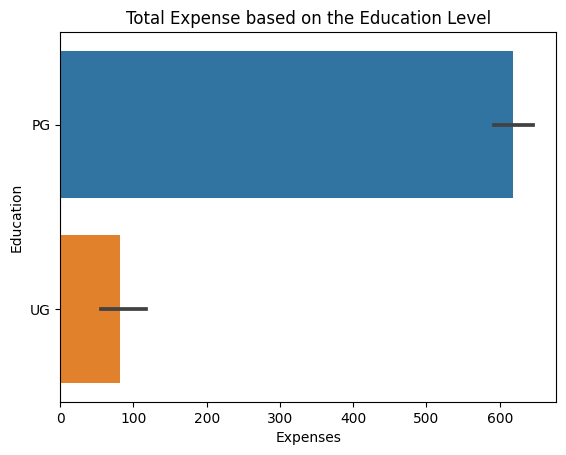

In [ ]:
sns.barplot(x = df['Expenses'],y = df['Education']);
plt.title('Total Expense based on the Education Level');

Kode di atas menggunakan fungsi `barplot` dari library Seaborn untuk membuat diagram batang. Diagram ini memvisualisasikan total pengeluaran (`Expenses`) berdasarkan tingkat pendidikan (`Education`). Setiap batang mewakili tingkat pendidikan, dan sumbu y menunjukkan total pengeluaran untuk setiap kategori. `plt.title` digunakan untuk memberikan judul pada plot.

Prompt : Berikan saya kode untuk menampilkan membuat diagram batang (bar plot) dari DataFrame `df`. Gunakan kolom 'Income' sebagai sumbu x dan 'Education' sebagai sumbu y pada diagram batang (bar plot). Terakhir, berikan judul pada diagram tersebut.

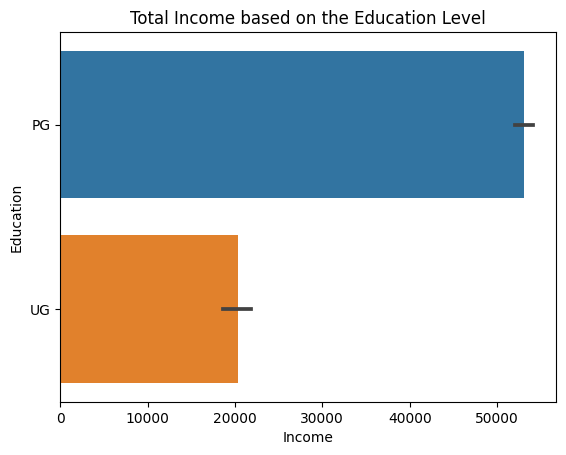

In [ ]:
sns.barplot(x = df['Income'],y = df['Education']);
plt.title('Total Income based on the Education Level');

Kode di atas menggunakan fungsi `barplot` dari library Seaborn untuk membuat diagram batang. Diagram ini memvisualisasikan total pendapatan (`Income`) berdasarkan tingkat pendidikan (`Education`). Setiap batang mewakili tingkat pendidikan, dan sumbu y menunjukkan total pendapatan untuk setiap kategori. `plt.title` digunakan untuk memberikan judul pada plot.

Prompt : Berikan saya kode untuk menampilkan deskripsi statistik dari DataFrame `df`

In [ ]:
df.describe()

,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.950446,605.798214,0.446875,14.862054,46.194196,538.043304
std,25037.797168,0.751803,602.249288,0.890543,7.677173,11.984069,232.229893
min,1730.000000,0.000000,5.000000,0.000000,0.000000,19.000000,26.000000
25%,35538.750000,0.000000,68.750000,0.000000,8.000000,38.000000,366.750000
50%,51741.500000,1.000000,396.000000,0.000000,15.000000,45.000000,539.000000
75%,68289.750000,1.000000,1045.500000,1.000000,21.000000,56.000000,711.250000
max,666666.000000,3.000000,2525.000000,5.000000,44.000000,122.000000,1089.000000


Fungsi `describe()` digunakan untuk memberikan statistik deskriptif dari dataset. Berikut adalah penjelasan dari hasil tersebut:

- **Income (Pendapatan):**
  - Rata-rata pendapatan adalah sekitar 52,247.
  - Pendapatan minimum adalah 1,730, dan maksimum adalah 666,666.
  - Persebaran pendapatan relatif besar, ditunjukkan oleh deviasi standar yang tinggi (sekitar 25,037).

- **Kids (Jumlah Anak):**
  - Rata-rata jumlah anak adalah sekitar 0.95.
  - Jumlah anak berkisar antara 0 hingga 3 anak.

- **Expenses (Total Pengeluaran):**
  - Rata-rata total pengeluaran adalah sekitar 605.80.
  - Total pengeluaran berkisar antara 5 hingga 2,525.

- **TotalAcceptedCmp (Total Kampenye yang Diterima):**
  - Rata-rata jumlah kampanye yang diterima adalah sekitar 0.45.
  - Jumlah kampanye yang diterima berkisar antara 0 hingga 5.

- **NumTotalPurchases (Total Pembelian):**
  - Rata-rata total pembelian adalah sekitar 14.86.
  - Total pembelian berkisar antara 0 hingga 44.

- **Age (Usia):**
  - Rata-rata usia responden adalah sekitar 46.19 tahun.
  - Usia berkisar antara 19 hingga 122 tahun.

- **day_engaged (Hari Terlibat):**
  - Rata-rata jumlah hari terlibat adalah sekitar 538.04.
  - Jumlah hari terlibat berkisar antara 26 hingga 1089.

Prompt : Berikan saya kode untuk menampilkan heatmap dari korelasi antar kolom dalam DataFrame `df`.

<Axes: >

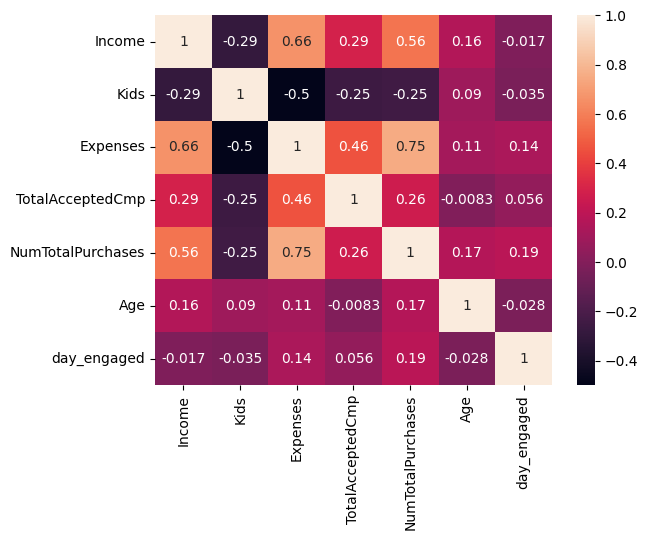

In [ ]:
sns.heatmap(df.corr(), annot=True)

Kode sns.heatmap(df.corr(), annot=True) digunakan untuk membuat matriks korelasi antara kolom-kolom numerik dalam DataFrame df dan menampilkan heatmap (peta panas) dengan anotasi (nilai numerik) di setiap sel. Di sini, sns merujuk pada pustaka Seaborn.

Matriks korelasi mengukur seberapa erat hubungan linier antara dua variabel numerik. Nilai korelasi berkisar antara -1 dan 1, di mana 1 menunjukkan korelasi positif sempurna, -1 menunjukkan korelasi negatif sempurna, dan 0 menunjukkan tidak ada korelasi.
Setiap sel pada heatmap direpresentasikan oleh warna yang mencerminkan nilai korelasi. Warna yang lebih terang menunjukkan korelasi yang lebih tinggi, sedangkan warna yang lebih gelap menunjukkan korelasi yang lebih rendah.
Anotasi (nilai numerik) ditampilkan di setiap sel untuk memberikan informasi lebih lanjut tentang seberapa kuat korelasi antara dua variabel.
Dengan melihat heatmap, Anda dapat dengan cepat mengidentifikasi hubungan korelasi antara berbagai fitur dalam dataset. Ini membantu dalam pemahaman hubungan antara variabel dan mempersiapkan data untuk analisis lebih lanjut atau pemodelan.

Prompt : Berikan saya kode untuk mendeteksi kolom-kolom kategorikal dalam DataFrame `df`. Kelompokkan kolom-kolom tersebut dalam sebuah list bernama `cate` dan tampilkan list tersebut.

In [ ]:
cate = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cate.append(i)

print(cate)

['Education', 'Marital_Status']


Kode tersebut digunakan untuk mengidentifikasi kolom-kolom dalam DataFrame `df` yang memiliki tipe data "object" (biasanya digunakan untuk merepresentasikan data kategori atau string). Hasil dari kode ini adalah daftar nama kolom yang bertipe "object" dalam DataFrame.

Jika dijalankan, hasilnya akan menampilkan daftar kolom-kolom tersebut, yang dapat digunakan untuk lebih lanjut memahami variabel kategorikal dalam dataset.

Hasil dari kode tersebut menunjukkan bahwa dua kolom dalam DataFrame `df` yang memiliki tipe data "object" adalah 'Education' dan 'Marital_Status'. Hal ini menunjukkan bahwa kedua kolom ini kemungkinan berisi data kategorikal atau teks yang perlu diproses lebih lanjut saat melakukan analisis atau pemodelan.

mengimpor modul `LabelEncoder` dan `StandardScaler`.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

Kode tersebut mengimpor dua modul dari pustaka `sklearn`:

1. **LabelEncoder**: Ini adalah metode untuk mengkodekan label kelas menjadi nilai numerik. Misalnya, jika Anda memiliki kolom 'Education' dengan nilai 'PhD', 'Master', dan 'UG', `LabelEncoder` dapat mengubahnya menjadi 0, 1, dan 2.

2. **StandardScaler**: Ini adalah metode untuk menormalkan fitur-fitur dari suatu dataset. Ini menskalakan setiap fitur sehingga memiliki mean nol dan deviasi standar satu. Metode ini umumnya digunakan dalam pemrosesan data sebelum pemodelan untuk memastikan bahwa semua fitur memiliki skala yang serupa.

Dengan mengimpor modul-modul ini, Anda siap untuk melakukan encoding dan normalisasi data pada DataFrame Anda.

Prompt : Berikan saya kode untuk menampilkan frekuensi masing-masing nilai dalam kolom 'Marital_Status' dari DataFrame `df`.

In [ ]:
df['Marital_Status'].value_counts()

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

Kode tersebut menghitung jumlah setiap nilai yang muncul dalam kolom 'Marital_Status'. Dari hasil di atas, terdapat dua nilai unik dalam kolom tersebut, yaitu "relationship" dan "Single". Ada 1444 entri dengan nilai "relationship" dan 796 entri dengan nilai "Single".

Prompt : Berikan saya kode menggunakan pustaka scikit-learn untuk menggunakan `LabelEncoder` pada kolom-kolom kategorikal dalam DataFrame `df`. Terapkan `fit_transform` pada setiap kolom kategorikal.


In [ ]:
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

Kode tersebut menggunakan `LabelEncoder` untuk mengkodekan nilai kategori dalam kolom-kolom yang memiliki tipe data objek (kategorikal) dalam DataFrame `df`. Proses ini akan menggantikan nilai kategorikal dengan nilai numerik yang sesuai.

Pertama, kode membuat objek `LabelEncoder` dengan nama `lbl_encode`. Kemudian, menggunakan loop `for` untuk mengiterasi melalui kolom-kolom dalam list `cate` (kolom-kolom kategorikal), dan mengaplikasikan `fit_transform` dari `LabelEncoder` pada setiap kolom tersebut. Proses ini menggantikan nilai kategorikal dengan nilai numerik yang sesuai.

Ini adalah langkah yang umum dilakukan dalam pra-pemrosesan data ketika kita memiliki data kategorikal dan ingin menggunakannya dalam pemodelan, karena banyak algoritma mesin hanya dapat bekerja dengan data numerik.

Prompt : Berikan saya kode untuk membuat salinan (copy) dari DataFrame `df` dan simpan dalam DataFrame baru bernama `df1`.

In [ ]:
df1 = df.copy()

Kode tersebut membuat salinan (copy) dari DataFrame `df` dan menyimpannya dalam DataFrame baru dengan nama `df1`. Ini dilakukan dengan menggunakan metode `copy()` pada DataFrame, sehingga `df1` sekarang memiliki data yang sama dengan `df`, tetapi berada di alamat memori yang berbeda. Melakukan salinan ini dapat berguna untuk menjaga data awal saat kita melakukan manipulasi atau transformasi pada DataFrame.

Prompt : Berikan saya kode untuk melakukan penskalaan fitur (feature scaling) pada DataFrame `df1` menggunakan `StandardScaler`. Simpan hasil penskalaan dalam DataFrame baru bernama `scaled_features_df`.

In [ ]:
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

Kode tersebut menggunakan `StandardScaler` dari scikit-learn untuk melakukan normalisasi fitur-fitur pada DataFrame `df1`. `fit_transform` digunakan untuk menghitung mean dan standar deviasi dari setiap fitur, dan kemudian melakukan normalisasi pada data.

Hasil normalisasi disimpan dalam DataFrame baru bernama `scaled_features_df`, yang memiliki indeks dan kolom yang sama dengan `df1`. Dengan normalisasi ini, setiap kolom sekarang memiliki mean nol dan deviasi standar satu, yang berguna dalam mempersiapkan data untuk proses pemodelan.

Prompt : Berikan saya kode untuk menampilkan menampilkan lima baris pertama dari DataFrame `scaled_features_df`.

In [ ]:
scaled_features_df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,-0.157171,-1.346874,0.235327,-1.264505,1.679417,0.621248,1.320826,0.985345,1.976745
1,-0.157171,-1.346874,-0.235826,1.396361,-0.961275,-0.501912,-1.154596,1.235733,-1.667011
2,-0.157171,0.742460,0.773633,-1.264505,0.282673,-0.501912,0.799685,0.317643,-0.172468
3,-0.157171,0.742460,-1.022732,0.065928,-0.918094,-0.501912,-0.894025,-1.268149,-1.925433
4,-0.157171,0.742460,0.241519,0.065928,-0.305254,-0.501912,0.539114,-1.017761,-0.822831


Kode scaled_features_df.head() digunakan untuk menampilkan lima baris pertama dari DataFrame hasil normalisasi. Setiap nilai dalam DataFrame ini telah diubah sedemikian rupa sehingga memiliki mean nol dan deviasi standar satu.

Hasil run tersebut menunjukkan lima baris pertama dari DataFrame `scaled_features_df` setelah proses normalisasi. Setiap nilai dalam DataFrame ini telah diubah sehingga memiliki mean nol dan deviasi standar satu, menjadikannya lebih cocok untuk digunakan dalam model-machine learning. Beberapa kolom yang ditampilkan dalam hasil run ini termasuk 'Education', 'Marital_Status', 'Income', 'Kids', 'Expenses', 'TotalAcceptedCmp', 'NumTotalPurchases', 'Age', dan 'day_engaged'.

mengimpor modul `KMeans` dari `sklearn.cluster`.

In [ ]:
from sklearn.cluster import KMeans

 mengimpor modul `KMeans` dari pustaka `sklearn`. `KMeans` adalah salah satu algoritma clustering yang populer untuk mengelompokkan data menjadi sejumlah cluster yang telah ditentukan. Dengan mengimpor `KMeans`, Anda dapat menggunakan algoritma ini untuk mengelompokkan data dalam analisis clustering.


Prompt : Berikan saya kode untuk mengimplementasikan metode "The Elbow Method" dengan K-Means clustering. Gunakan modul `KMeans` dengan inisialisasi 'k-means++' dan `random_state=42`. Gambarkan grafik untuk menentukan jumlah optimal cluster berdasarkan metode elbow.

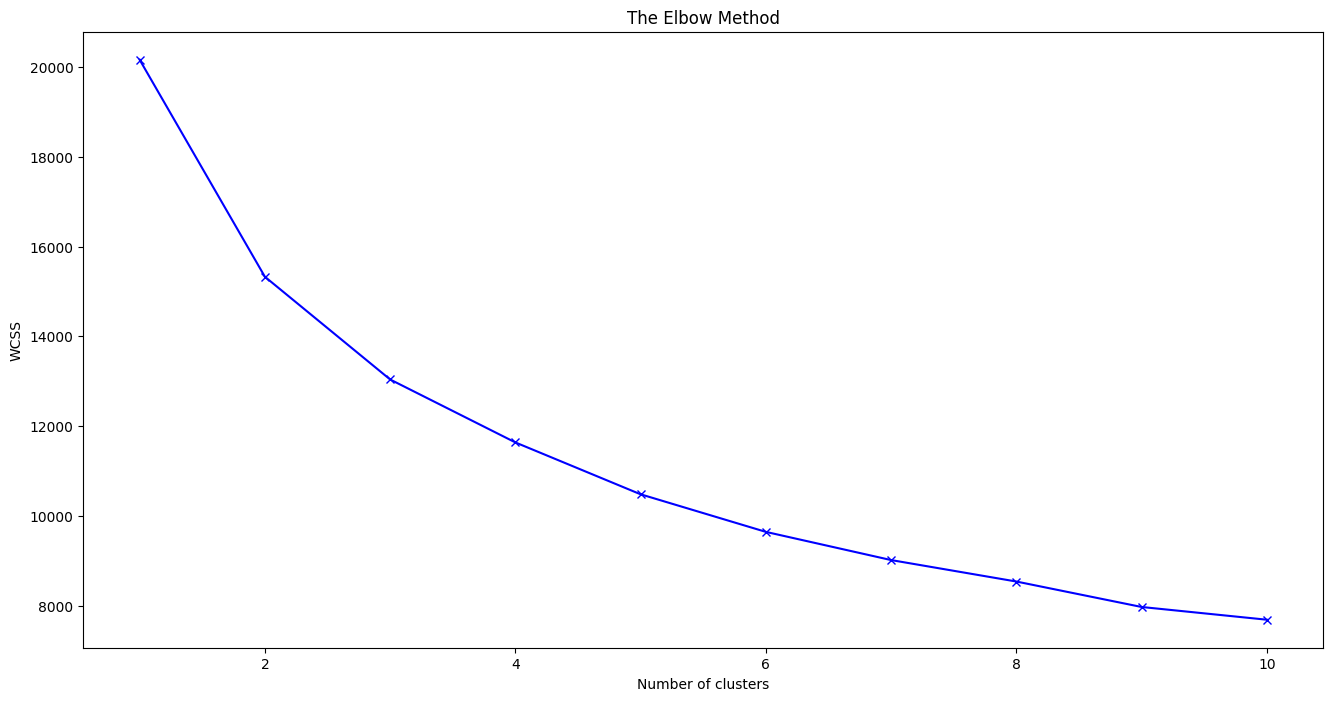

In [ ]:
wcss=[]
for i in range (1,11):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(scaled_features_df)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Kode ini melakukan perhitungan *Within-Cluster-Sum-of-Squares* (WCSS) untuk berbagai jumlah klaster (cluster) pada data yang telah dinormalisasi (`scaled_features_df`). WCSS mengukur seberapa jauh titik-titik dalam satu klaster berada dari pusat klaster tersebut.

- `n_clusters=i` mengindikasikan jumlah klaster yang sedang diuji.
- `init='k-means++'` digunakan untuk memilih posisi awal klaster dengan lebih cermat.
- `random_state=42` digunakan untuk memastikan hasil yang konsisten pada setiap eksekusi.

Setelah menghitung WCSS untuk setiap jumlah klaster, hasilnya diplot dalam grafik menggunakan *The Elbow Method*. Pada metode ini, kita mencari titik di mana penurunan WCSS mulai melambat secara signifikan, membentuk lengkungan seperti siku atau "elbow". Pada titik tersebut, jumlah klaster dianggap sebagai pilihan yang baik.

Grafik ini membantu menentukan jumlah klaster optimal untuk algoritma KMeans pada dataset tertentu.

Grafik yang dihasilkan adalah grafik *The Elbow Method*, yang membantu menentukan jumlah klaster yang optimal. Pada grafik tersebut, sumbu x menunjukkan jumlah klaster yang diuji, sedangkan sumbu y menunjukkan nilai WCSS (Within-Cluster-Sum-of-Squares).

Analisis hasil run dapat dilakukan dengan mencari "elbow" atau siku pada grafik, yaitu titik di mana penurunan WCSS mulai melambat secara signifikan. Pada titik tersebut, penambahan jumlah klaster tidak memberikan keuntungan yang signifikan dalam mengurangi WCSS. Oleh karena itu, jumlah klaster optimal dapat dianggap sebagai jumlah klaster pada titik elbow.

Pada grafik yang Anda hasilkan, mencari titik elbow bisa menjadi subjektif, tetapi nampaknya titik elbow mungkin berada di sekitar 3 atau 4 klaster. Oleh karena itu, jumlah klaster yang optimal untuk data ini mungkin adalah 3 atau 4.

Perlu dicatat bahwa pemilihan jumlah klaster optimal juga dapat melibatkan pertimbangan bisnis dan pemahaman lebih lanjut tentang konteks data.


mengimpor modul `silhouette_score` dari scikit-learn.

In [ ]:
from sklearn.metrics import silhouette_score

Kode tersebut mengimpor modul silhouette_score dari pustaka sklearn.metrics. silhouette_score digunakan untuk mengukur sejauh mana suatu objek berada di dalam klaster dibandingkan dengan klaster lainnya. Metrik ini memberikan nilai antara -1 dan 1. Nilai positif menunjukkan bahwa objek berada di dalam klaster yang sesuai, sedangkan nilai negatif menunjukkan bahwa objek mungkin lebih cocok dalam klaster lain.

Prompt : Berikan saya kode untuk mengimplementasikan metode Silhouette Score dengan K-Means clustering. Gunakan modul `KMeans` dengan `random_state=42`. Gambarkan grafik Silhouette Score untuk berbagai jumlah cluster.

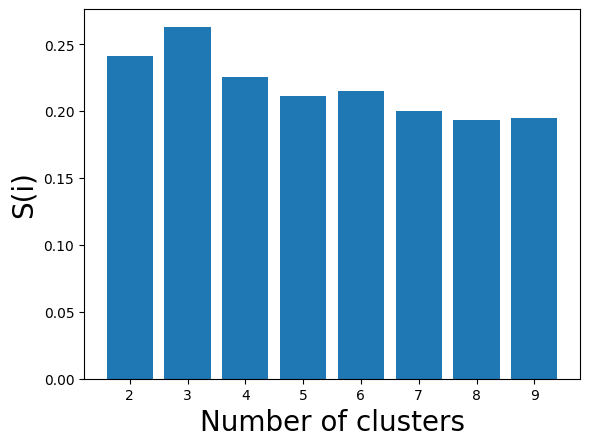

In [ ]:
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(scaled_features_df)
    silhouette_scores.append(silhouette_score(scaled_features_df, m1.fit_predict(scaled_features_df)))
plt.bar(range(2,10), silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

Dalam plot Elbow Method, sumbu x menunjukkan jumlah klaster (k), sedangkan sumbu y menunjukkan nilai WCSS (Within-Cluster Sum of Squares), yang merupakan jumlah kuadrat jarak antara setiap titik data dalam suatu klaster dengan pusat klasternya. Tujuan kita adalah mencari titik di mana penambahan klaster tidak memberikan pengurangan signifikan dalam WCSS. Poin ini biasanya disebut "elbow," yang menandakan bahwa penambahan klaster setelahnya tidak memberikan manfaat yang signifikan.

Analisis hasil plot Elbow Method:
- Pada plot tersebut, kita dapat melihat bahwa penurunan WCSS melambat secara signifikan setelah jumlah klaster 3.
- Pada titik k=3, ada "elbow" yang mengindikasikan bahwa penambahan klaster setelahnya tidak memberikan pengurangan WCSS yang signifikan.
- Oleh karena itu, jumlah klaster yang optimal mungkin adalah 3 berdasarkan metode ini.

Dalam plot Silhouette Score, setiap bar mewakili nilai silhouette score untuk jumlah klaster tertentu. Silhouette score mengukur seberapa baik objek dalam klaster yang sama dibandingkan dengan klaster lainnya. Nilai tertinggi terjadi ketika objek dalam suatu klaster berdekatan satu sama lain dan terpisah dari klaster lain.

Analisis hasil plot Silhouette Score:
- Nilai silhouette score tertinggi terjadi saat k=2, menunjukkan bahwa pembagian menjadi dua klaster memberikan hasil yang baik.
- Meskipun nilai silhouette score untuk k=3 masih cukup tinggi, penurunannya dapat disebabkan oleh ketidakhomogenan dalam distribusi data.
- Seiring dengan Elbow Method, jumlah klaster yang direkomendasikan oleh Silhouette Score adalah 2.

Secara keseluruhan, berdasarkan kedua metode tersebut, pilihan jumlah klaster yang optimal mungkin adalah 2 atau 3. Perlu diperhatikan bahwa pemilihan jumlah klaster juga dapat dipengaruhi oleh konteks masalah dan tujuan analisis lebih lanjut.

Prompt : Berikan saya kode untuk menghitung dan menampilkan nilai Silhouette Score dari K-Means clustering dengan variasi jumlah cluster.

In [ ]:
silhouette_scores

[0.24145101432627075,
 0.2630066765900862,
 0.22547869857815794,
 0.2112495373878677,
 0.2149228429852001,
 0.1997135405176978,
 0.19301680336746188,
 0.19495794809915995]

memanggil nilai-nilai variabel silhouette_scores

Prompt : Berikan saya kode untuk menentukan jumlah optimal cluster berdasarkan nilai Silhouette Score. Gunakan modul `KMeans` dengan `random_state=42` dan jumlah cluster berkisar dari 2 hingga 9. Tampilkan jumlah optimal cluster berdasarkan nilai Silhouette Score.

In [ ]:
# Getting the maximum value of silhouette score and adding 2 in index because index starts from 2.

sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  3


Dalam potongan kode di atas, kita mencari nilai maksimum dari silhouette scores dan menentukan jumlah cluster terbaik berdasarkan nilai tersebut. Silhouette score memberikan indikasi seberapa baik setiap data pada cluster tertentu dibandingkan dengan cluster lainnya. Nilai silhouette score berkisar antara -1 hingga 1, di mana nilai yang lebih tinggi menunjukkan bahwa objek lebih cocok dengan cluster tempat mereka berada.

Hasil run menunjukkan bahwa jumlah cluster terbaik adalah 3, karena nilai silhouette score tertinggi terjadi pada k = 3. Ini bisa diartikan bahwa pembagian data menjadi 3 cluster memberikan hasil yang paling baik dalam konteks silhouette score. Hal ini dapat membantu dalam menentukan jumlah cluster yang optimal untuk pemodelan berikutnya.

Prompt : Berikan saya kode untuk melakukan K-Means clustering dengan jumlah optimal cluster yang telah ditentukan berdasarkan nilai Silhouette Score. Gunakan modul `KMeans` dengan `random_state=42`. Tambahkan kolom 'cluster' ke DataFrame `df` yang berisi label cluster untuk setiap data.

In [ ]:
# Training a predicting using K-Means Algorithm.

kmeans=KMeans(n_clusters=number_of_clusters, random_state=42).fit(scaled_features_df)
pred=kmeans.predict(scaled_features_df)


# Appending those cluster value into main dataframe (without standard-scalar)

df['cluster'] = pred + 1

Pada potongan kode di atas, kita menggunakan algoritma K-Means untuk melatih model dan melakukan prediksi pada data yang telah dinormalisasi. Model K-Means telah ditentukan sebelumnya dengan jumlah cluster yang telah diidentifikasi sebagai yang terbaik melalui analisis elbow dan silhouette.

Hasil prediksi kemudian ditambahkan ke dalam dataframe utama sebagai kolom baru dengan nama 'cluster'. Setiap data sekarang memiliki label cluster yang menunjukkan keanggotaan mereka dalam kelompok tertentu berdasarkan model K-Means yang telah dilatih.

Prompt : Berikan saya kode untuk menampilkan lima baris pertama dari DataFrame `df` setelah melakukan K-Means clustering dan menambahkan kolom 'cluster'.

In [ ]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged,cluster
0,0,0,58138.0,0,1617,1,25,58,997,2
1,0,0,46344.0,2,27,0,6,61,151,1
2,0,1,71613.0,0,776,0,21,50,498,2
3,0,1,26646.0,1,53,0,8,31,91,1
4,0,1,58293.0,1,422,0,19,34,347,1


Hasil run dari `df.head()` menunjukkan dataframe yang telah ditambahkan kolom 'cluster', yang menyimpan label klaster untuk setiap entri data. Setiap entri sekarang memiliki atribut 'cluster' yang menunjukkan keanggotaannya dalam suatu kelompok tertentu berdasarkan hasil algoritma K-Means.

Prompt : Berikan saya kode untuk menampilkan lima baris pertama dari DataFrame `scaled_features_df` setelah melakukan penskalaan fitur menggunakan modul `StandardScaler`. Pastikan untuk membaca data dari file CSV yang sesuai dan menyimpannya dalam DataFrame sebelum melakukan penskalaan fitur.

In [ ]:
scaled_features_df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,-0.157171,-1.346874,0.235327,-1.264505,1.679417,0.621248,1.320826,0.985345,1.976745
1,-0.157171,-1.346874,-0.235826,1.396361,-0.961275,-0.501912,-1.154596,1.235733,-1.667011
2,-0.157171,0.742460,0.773633,-1.264505,0.282673,-0.501912,0.799685,0.317643,-0.172468
3,-0.157171,0.742460,-1.022732,0.065928,-0.918094,-0.501912,-0.894025,-1.268149,-1.925433
4,-0.157171,0.742460,0.241519,0.065928,-0.305254,-0.501912,0.539114,-1.017761,-0.822831


Kode di atas melakukan pemrosesan data dengan dua langkah utama:

1. **Label Encoding dan Standard Scaling:** Pertama, label encoding digunakan untuk mengubah nilai-nilai kategori pada kolom 'Education' dan 'Marital_Status' menjadi representasi numerik. Selanjutnya, dilakukan standard scaling menggunakan `StandardScaler` untuk menormalkan nilai-nilai pada fitur-fitur numerik dalam dataframe. Hasil dari kedua langkah ini tersimpan dalam `scaled_features_df`.

2. **Menambahkan Kolom Cluster:** Kode kemudian menambahkan kolom 'cluster' pada dataframe awal `df` yang menyimpan label klaster untuk setiap entri data. Langkah ini dilakukan setelah standard scaling untuk mendapatkan pemetaan klaster yang optimal. Dengan demikian, setiap baris sekarang memiliki atribut 'cluster' yang menunjukkan keanggotaannya dalam suatu kelompok tertentu berdasarkan hasil algoritma K-Means.

Prompt : Berikan saya kode untuk menampilkan nilai hitungan untuk setiap nilai dalam kolom 'Education' dari DataFrame `df`.

In [ ]:
df['Education'].value_counts()

0    2186
1      54
Name: Education, dtype: int64

Setelah melakukan label encoding pada kolom 'Education', kita dapat mengecek distribusi kategori pendidikan baru. Jika sebelumnya kita memiliki kategori 'PhD', '2n Cycle', 'Graduation', dan 'Master', sekarang kita hanya memiliki dua kategori baru, yaitu 'PG' dan 'UG'. Untuk mengetahui distribusinya, kita bisa menggunakan perintah:

Ini akan memberikan informasi tentang jumlah entri data untuk setiap kategori pendidikan. Silakan jalankan perintah tersebut dan beri tahu saya hasilnya.

Prompt : Berikan saya kode untuk membuat countplot yang menampilkan distribusi dari kolom 'cluster' pada DataFrame `df` setelah melakukan K-Means clustering.

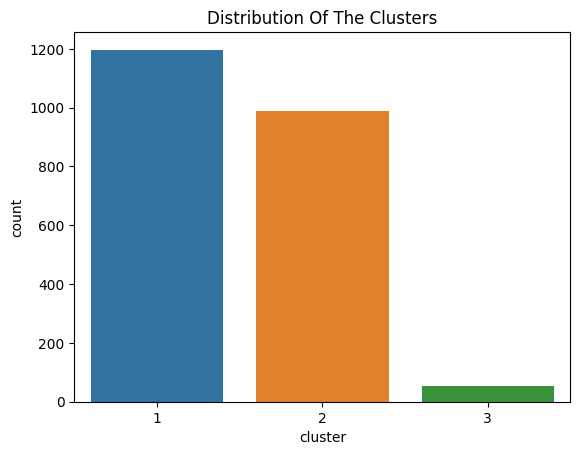

In [ ]:
pl = sns.countplot(x=df["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

Perintah di atas menggunakan seaborn untuk membuat count plot dari kolom 'cluster' dalam DataFrame Anda. Count plot digunakan untuk menggambarkan distribusi kategori di suatu variabel. Dalam konteks ini, Anda sedang mencoba melihat distribusi data pada setiap klaster yang dihasilkan oleh algoritma K-Means.

Setelah menjalankan perintah tersebut, grafik akan menunjukkan bagaimana data terdistribusi di setiap klaster. Apakah ada yang dominan atau seimbang di antara klaster-klaster tersebut? Berikan saya informasi tentang hasil plot tersebut.

Prompt : Berikan saya kode untuk membuat multiple histograms (facet grid) yang menampilkan distribusi dari setiap kolom pada DataFrame `df` berdasarkan nilai kolom 'cluster'.

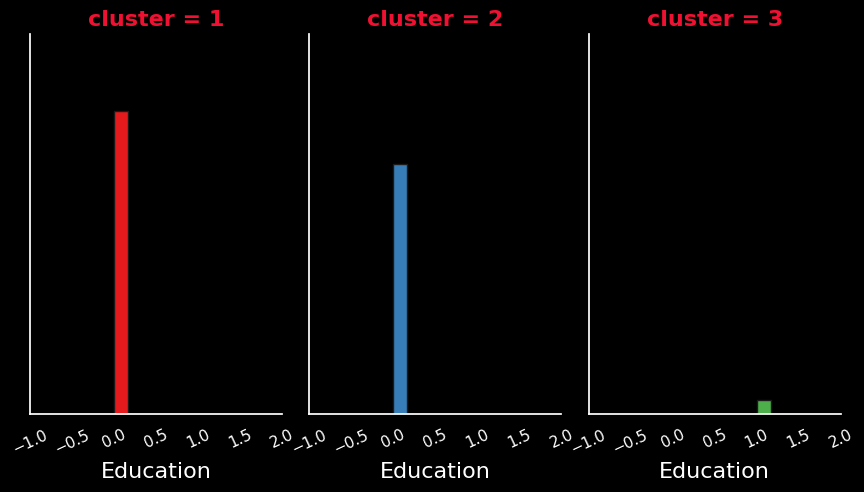

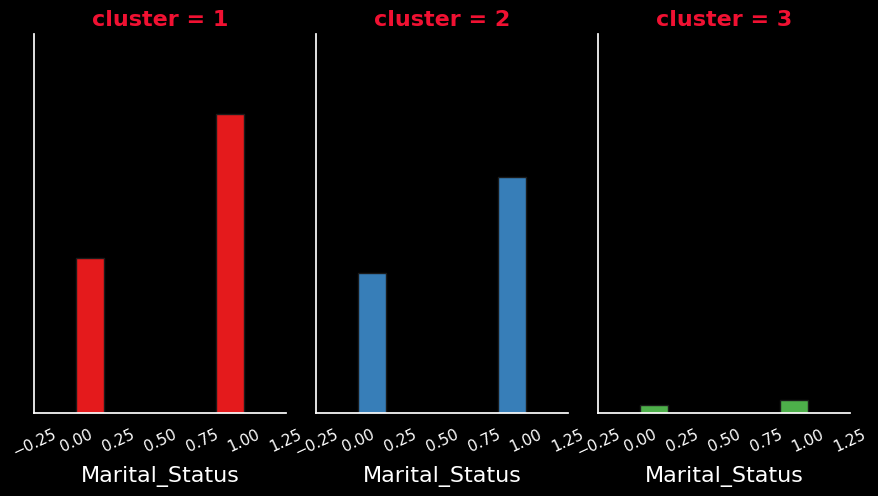

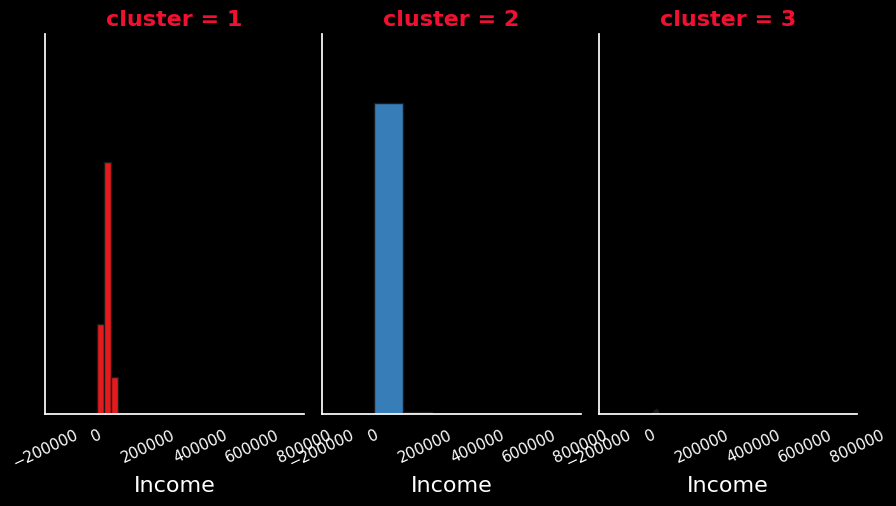

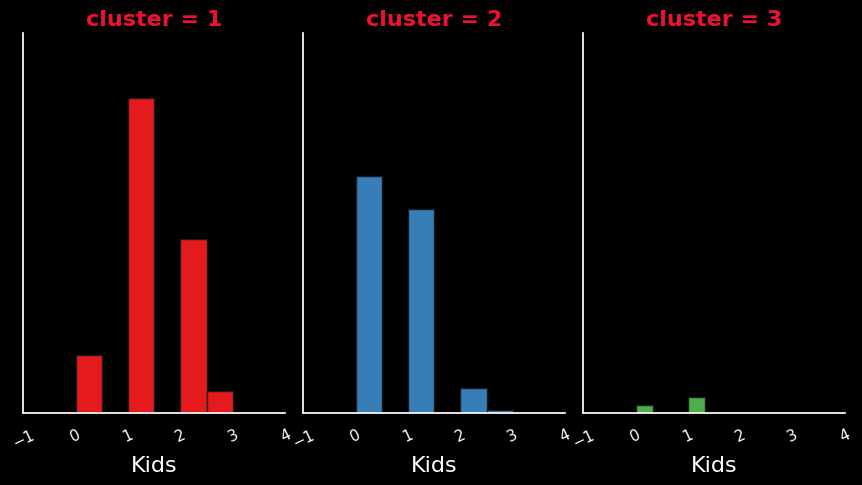

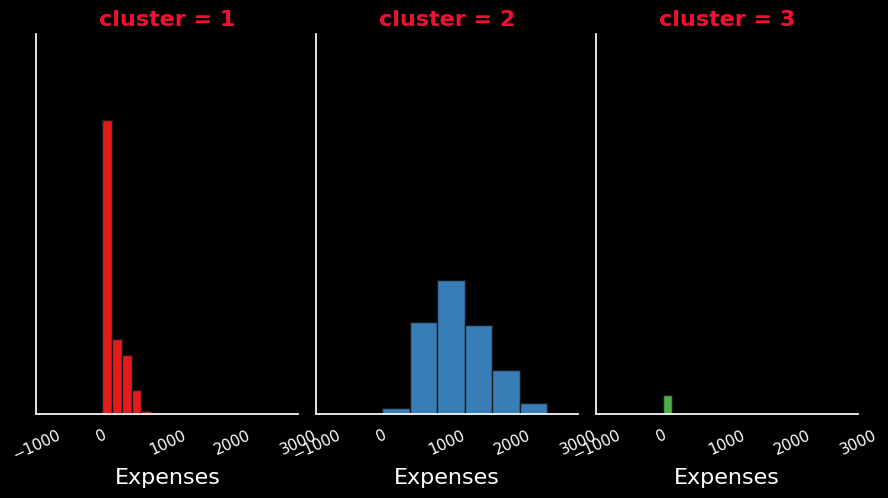

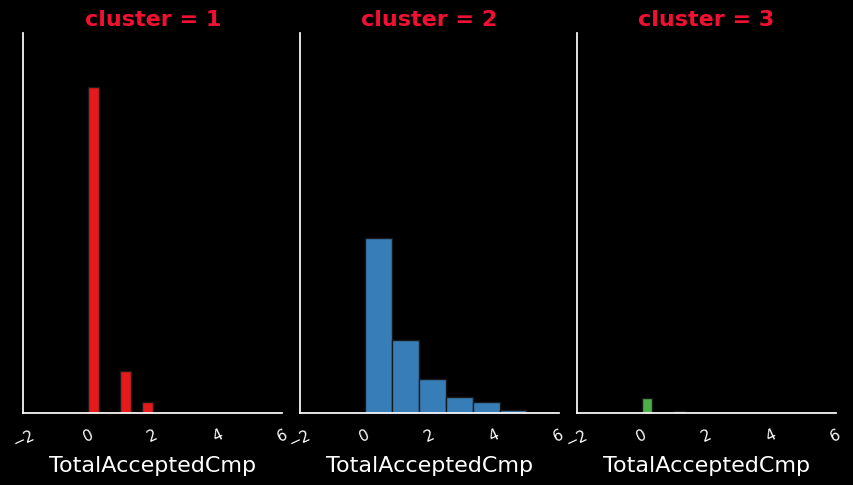

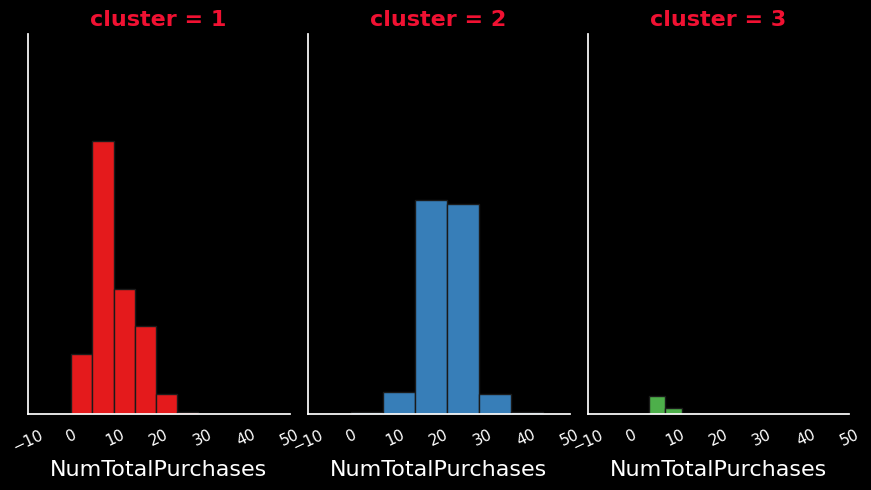

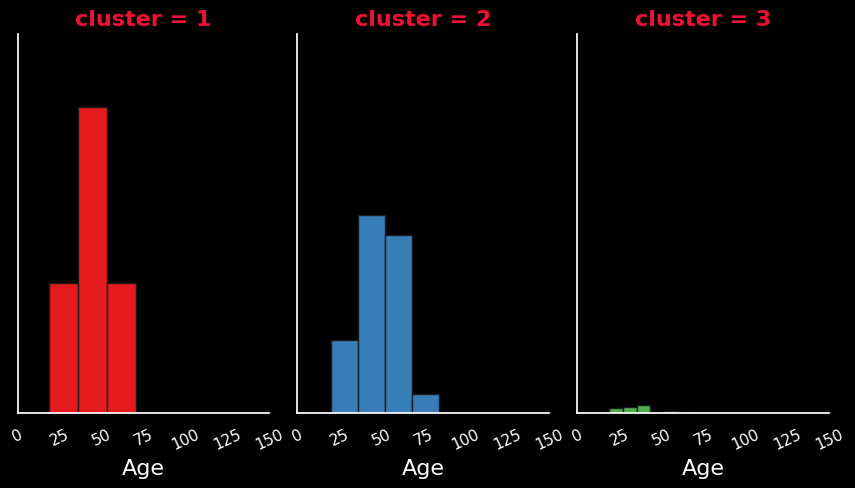

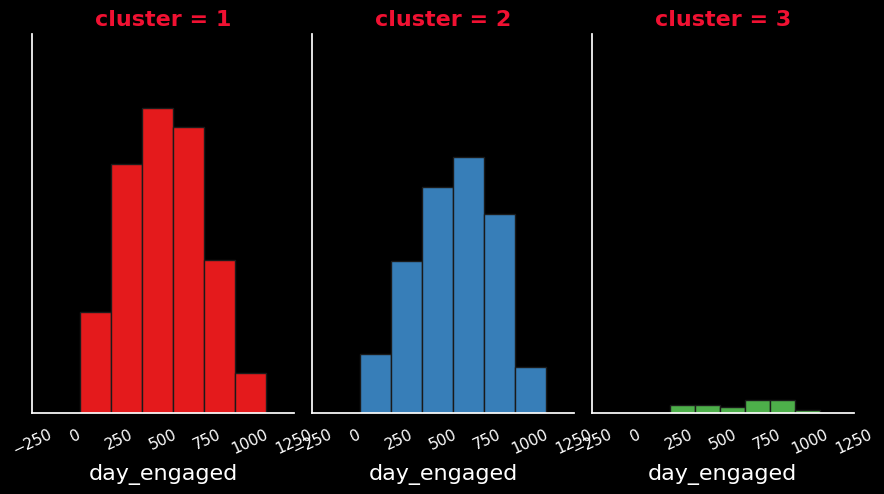

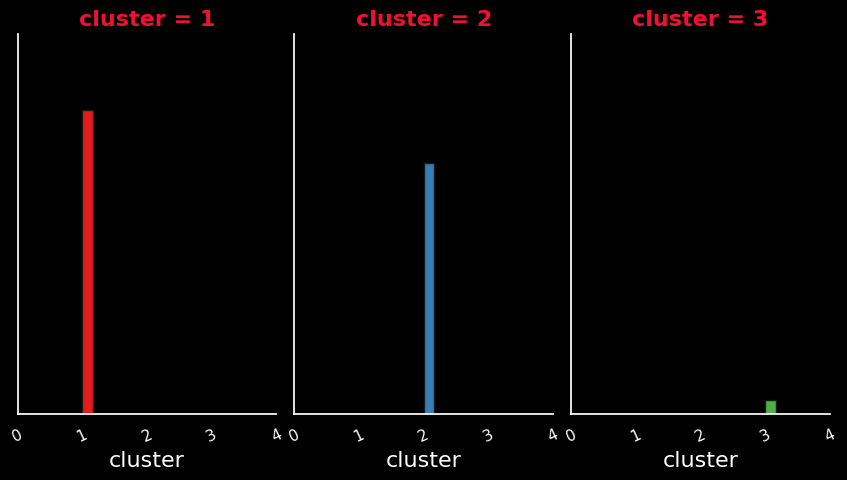

In [ ]:
# Clusters interpretation
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False, 'font.family': 'Ubuntu'})

for i in df:
    diag = sns.FacetGrid(df, col = "cluster", hue = "cluster", palette = "Set1")
    diag.map(plt.hist, i, bins=6, ec="k")
    diag.set_xticklabels(rotation=25, color = 'white')
    diag.set_yticklabels(color = 'white')
    diag.set_xlabels(size=16, color = 'white')
    diag.set_titles(size=16, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(6)

Kode di atas menggunakan seaborn untuk membuat sejumlah FacetGrid yang memungkinkan kita melihat distribusi variabel dalam setiap klaster. Ini dilakukan dengan membuat histogram untuk setiap variabel pada setiap klaster.

- `FacetGrid` digunakan untuk membuat grid plot berdasarkan kategori tertentu, dalam hal ini, klaster.
- `diag.map(plt.hist, i, bins=6, ec="k")` menggambarkan histogram untuk setiap variabel (`i`) pada setiap klaster, dengan jumlah bins sebanyak 6 dan garis tepi (edge color) hitam.
- Konfigurasi warna dan gaya plot dilakukan dengan memanfaatkan properti-properti seperti `set_xticklabels`, `set_yticklabels`, `set_xlabels`, `set_titles`, dan sebagainya.

Hasilnya adalah sejumlah subplot yang memperlihatkan distribusi variabel-variabel tertentu dalam masing-masing klaster.